In [1]:
from Investment import Investment

import pandas as pd

import matplotlib.pyplot as plt

In [2]:
def get_benchmark_accumulated_return(benchmark, sym):

    benchmark['month'] = pd.to_datetime(benchmark['month'], format="%Y-%m-%d")

    benchmark = benchmark[benchmark["sym.2"] == sym]

    accumulated_percent = 1

    for i in range(len(benchmark)):

        accumulated_percent *= (benchmark.iloc[i]['returns.2']/100) + 1

        benchmark.at[benchmark.index[i], 'returns.2'] = (accumulated_percent - 1) * 100

    return benchmark

def pls_visualize(pls):

    columns = ['ticker', 'buy_date', 'buy_price', 'sell_date', 'sell_price', 'ls', 'pl', 'pl_percent']
    df = pd.DataFrame(columns=columns)
    for i in pls:
        df.loc[len(df)] = [
            i['ticker'],
            i['buy_date'],
            i['buy_price'],
            i['sell_date'],
            i['sell_price'],
            i['ls'],
            i['pl'],
            i['pl_percent']
        ]

    return df

In [3]:
ticker = "BTC" # CHANGE THE CRYPTO YOU WANT TO TEST FROM EITHER OF THE FOLLOWING ("BTC", "ETH")

BTC_daily = pd.read_csv(ticker + '-USDT_daily.csv')

benchmark = pd.read_csv('benchmark.csv', index_col=0)

benchmark = get_benchmark_accumulated_return(benchmark=benchmark, sym=ticker)

BTC_daily

,date,open,high,low,close,volume
0,2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377
1,2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264
2,2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763
3,2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022
4,2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060
...,...,...,...,...,...,...
2416,2024-03-29,70780.60,70916.16,69009.00,69850.54,25445.083530
2417,2024-03-30,69850.53,70321.10,69540.00,69582.18,13644.611420
2418,2024-03-31,69582.17,71366.00,69562.99,71280.01,19396.344330
2419,2024-04-01,71280.00,71288.23,68062.86,69649.80,41445.320390


In [4]:
strategy = Investment(file_name=BTC_daily, ticker = ticker + '/USDT')
strategy.daily_inside_candle_strategy_long_reference_loss(cur_date="2017-08-17", end_date="2024-03-31", num_of_bar=1)

df_pls = pls_visualize(strategy.stockAccount.get_pls())

accumulated_percent = 1
# accumulated_percent *= (i['pl_percent'] / 100) + 1
columns = ["date", "pl_percent"]
result = pd.DataFrame(columns=columns)
for i in range(len(df_pls)):
    accumulated_percent *= (df_pls.iloc[i]['pl_percent']/100) + 1
    row = [df_pls.iloc[i]['buy_date'], (accumulated_percent - 1) * 100]
    result.loc[len(result.index)] = row

result.insert(2, ticker + "_return", [None for i in range(len(result))], True)

for i in range(len(result)):
    for j in range(len(benchmark)):
        # datetime.datetime.strptime()
        if result.iloc[i]['date'].year == benchmark.iloc[j]['month'].year and result.iloc[i]['date'].month == benchmark.iloc[j]['month'].month:
            result.at[result.index[i], ticker + '_return'] = benchmark.iloc[j]['returns.2'] * 100
            break

In [5]:

BTC_daily = pd.read_csv(ticker + '-USDT_daily.csv')

strategy2 = Investment(file_name=BTC_daily, ticker = ticker + '/USDT')
strategy2.daily_inside_candle_strategy_long_reference_loss(cur_date="2017-08-17", end_date="2024-03-31", num_of_bar=2)

df_pls2 = pls_visualize(strategy2.stockAccount.get_pls())

accumulated_percent = 1
# accumulated_percent *= (i['pl_percent'] / 100) + 1
columns = ["date", "pl_percent"]
result2 = pd.DataFrame(columns=columns)
for i in range(len(df_pls2)):
    accumulated_percent *= (df_pls2.iloc[i]['pl_percent']/100) + 1
    row = [df_pls2.iloc[i]['buy_date'], (accumulated_percent - 1) * 100]
    result2.loc[len(result2.index)] = row

result2.insert(2, ticker + "_return", [None for i in range(len(result2))], True)

for i in range(len(result2)):
    for j in range(len(benchmark)):
        # datetime.datetime.strptime()
        if result2.iloc[i]['date'].year == benchmark.iloc[j]['month'].year and result2.iloc[i]['date'].month == benchmark.iloc[j]['month'].month:
            result2.at[result2.index[i], ticker + '_return'] = benchmark.iloc[j]['returns.2'] * 100
            break

In [6]:
BTC_daily = pd.read_csv(ticker + '-USDT_daily.csv')

strategy3 = Investment(file_name=BTC_daily, ticker = ticker + '/USDT')
strategy3.daily_inside_candle_strategy_long_reference_loss(cur_date="2017-08-17", end_date="2024-03-31", num_of_bar=3)

df_pls3 = pls_visualize(strategy3.stockAccount.get_pls())

accumulated_percent = 1
# accumulated_percent *= (i['pl_percent'] / 100) + 1
columns = ["date", "pl_percent"]
result3 = pd.DataFrame(columns=columns)
for i in range(len(df_pls3)):
    accumulated_percent *= (df_pls3.iloc[i]['pl_percent']/100) + 1
    row = [df_pls3.iloc[i]['buy_date'], (accumulated_percent - 1) * 100]
    result3.loc[len(result3.index)] = row

result3.insert(2, ticker + "_return", [None for i in range(len(result3))], True)

for i in range(len(result3)):
    for j in range(len(benchmark)):
        # datetime.datetime.strptime()
        if result3.iloc[i]['date'].year == benchmark.iloc[j]['month'].year and result3.iloc[i]['date'].month == benchmark.iloc[j]['month'].month:
            result3.at[result3.index[i], ticker + '_return'] = benchmark.iloc[j]['returns.2'] * 100
            break

In [7]:
BTC_daily = pd.read_csv(ticker + '-USDT_daily.csv')

strategy4 = Investment(file_name=BTC_daily, ticker = ticker + '/USDT')
strategy4.daily_inside_candle_strategy_long_reference_loss(cur_date="2017-08-17", end_date="2024-03-31", num_of_bar=4)

df_pls4 = pls_visualize(strategy4.stockAccount.get_pls())

accumulated_percent = 1
# accumulated_percent *= (i['pl_percent'] / 100) + 1
columns = ["date", "pl_percent"]
result4 = pd.DataFrame(columns=columns)
for i in range(len(df_pls4)):
    accumulated_percent *= (df_pls4.iloc[i]['pl_percent']/100) + 1
    row = [df_pls4.iloc[i]['buy_date'], (accumulated_percent - 1) * 100]
    result4.loc[len(result4.index)] = row

result4.insert(2, ticker + "_return", [None for i in range(len(result4))], True)

for i in range(len(result4)):
    for j in range(len(benchmark)):
        # datetime.datetime.strptime()
        if result4.iloc[i]['date'].year == benchmark.iloc[j]['month'].year and result4.iloc[i]['date'].month == benchmark.iloc[j]['month'].month:
            result4.at[result4.index[i], ticker + '_return'] = benchmark.iloc[j]['returns.2'] * 100
            break

In [8]:
BTC_daily = pd.read_csv(ticker + '-USDT_daily.csv')

strategy5 = Investment(file_name=BTC_daily, ticker = ticker + '/USDT')
strategy5.daily_inside_candle_strategy_long_reference_loss(cur_date="2017-08-17", end_date="2024-03-31", num_of_bar=5)

df_pls5 = pls_visualize(strategy5.stockAccount.get_pls())

accumulated_percent = 1
# accumulated_percent *= (i['pl_percent'] / 100) + 1
columns = ["date", "pl_percent"]
result5 = pd.DataFrame(columns=columns)
for i in range(len(df_pls5)):
    accumulated_percent *= (df_pls5.iloc[i]['pl_percent']/100) + 1
    row = [df_pls5.iloc[i]['buy_date'], (accumulated_percent - 1) * 100]
    result5.loc[len(result5.index)] = row

result5.insert(2, ticker + "_return", [None for i in range(len(result5))], True)

for i in range(len(result5)):
    for j in range(len(benchmark)):
        # datetime.datetime.strptime()
        if result5.iloc[i]['date'].year == benchmark.iloc[j]['month'].year and result5.iloc[i]['date'].month == benchmark.iloc[j]['month'].month:
            result5.at[result4.index[i], ticker + '_return'] = benchmark.iloc[j]['returns.2'] * 100
            break

In [9]:
result

,date,pl_percent,BTC_return
0,2017-08-29,3.556786,10.874391
1,2017-09-07,-3.996735,4.227783
2,2017-09-19,-15.043259,4.227783
3,2017-09-26,19.237911,4.227783
4,2017-10-30,26.431252,51.855876
...,...,...,...
90,2023-12-22,1522.165588,416.706852
91,2024-01-02,1473.172604,417.437093
92,2024-01-09,1333.506786,417.437093
93,2024-01-27,1657.917930,417.437093


In [10]:
result2

,date,pl_percent,BTC_return
0,2017-08-29,3.556786,10.874391
1,2017-09-19,-8.358876,4.227783
2,2017-09-26,28.619530,4.227783
3,2017-10-30,36.378842,51.855876
4,2017-11-16,210.435191,104.361931
...,...,...,...
77,2023-12-22,868.923633,416.706852
78,2024-01-02,839.659999,417.437093
79,2024-01-09,756.237251,417.437093
80,2024-01-27,950.008853,417.437093


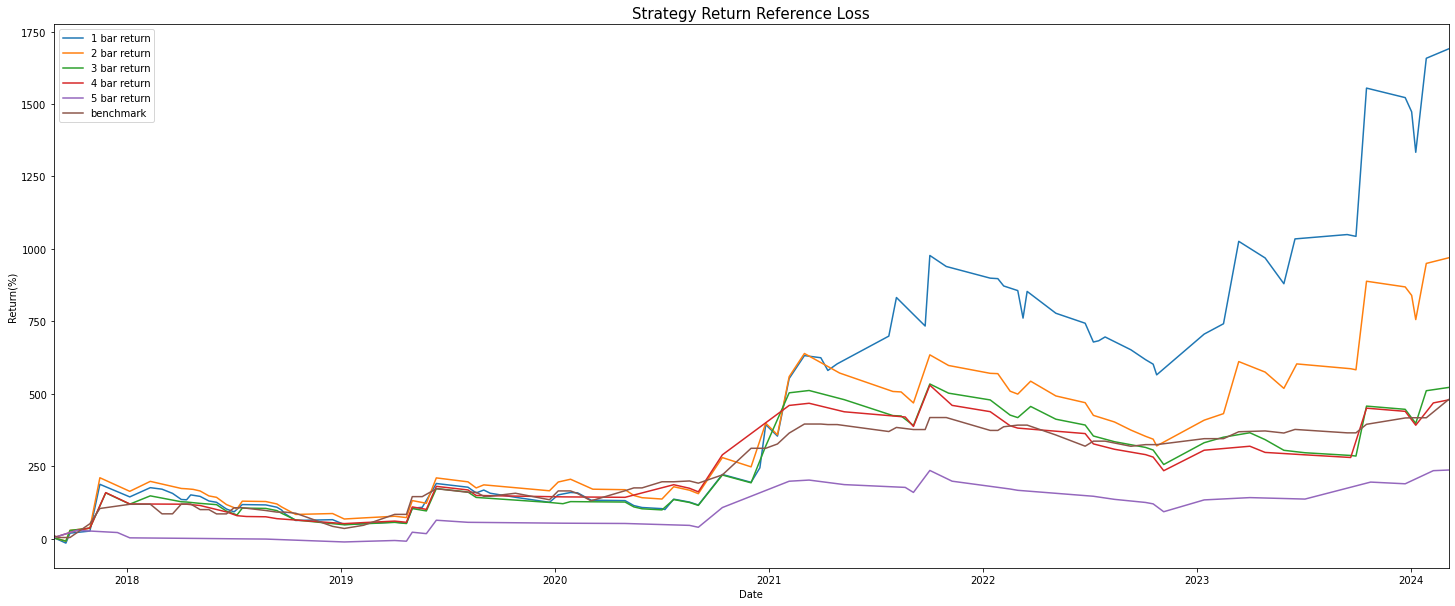

In [12]:
fig = plt.subplots(figsize=(25, 10))

plt.title('Strategy Return Reference Loss', fontsize=15)

plt.xlabel('Date', fontsize=10)
plt.ylabel('Return(%)', fontsize=10)

plt.plot(result['date'], result['pl_percent'], label="1 bar return")
plt.plot(result2['date'], result2['pl_percent'], label="2 bar return")
plt.plot(result3['date'], result3['pl_percent'], label="3 bar return")
plt.plot(result4['date'], result4['pl_percent'], label="4 bar return")
plt.plot(result5['date'], result5['pl_percent'], label="5 bar return")
# plt.plot(result.index, result['pl_percent'], label="strategy return")
plt.plot(result['date'], result[ticker + '_return'], label="benchmark")
plt.legend()

plt.xlim(result['date'].min(), result['date'].max())
# plt.xlim(result.index.min(), result.index.max())
# ticks = ['2018-01-01', '2019-01-01', '2020-01-01', '2021-01-01', '2022-01-01', '2023-01-01', '2024-01-01']
# plt.xticks(ticks)
plt.show()